# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'CNN_Baseline_4Conv_Struct_ext2'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

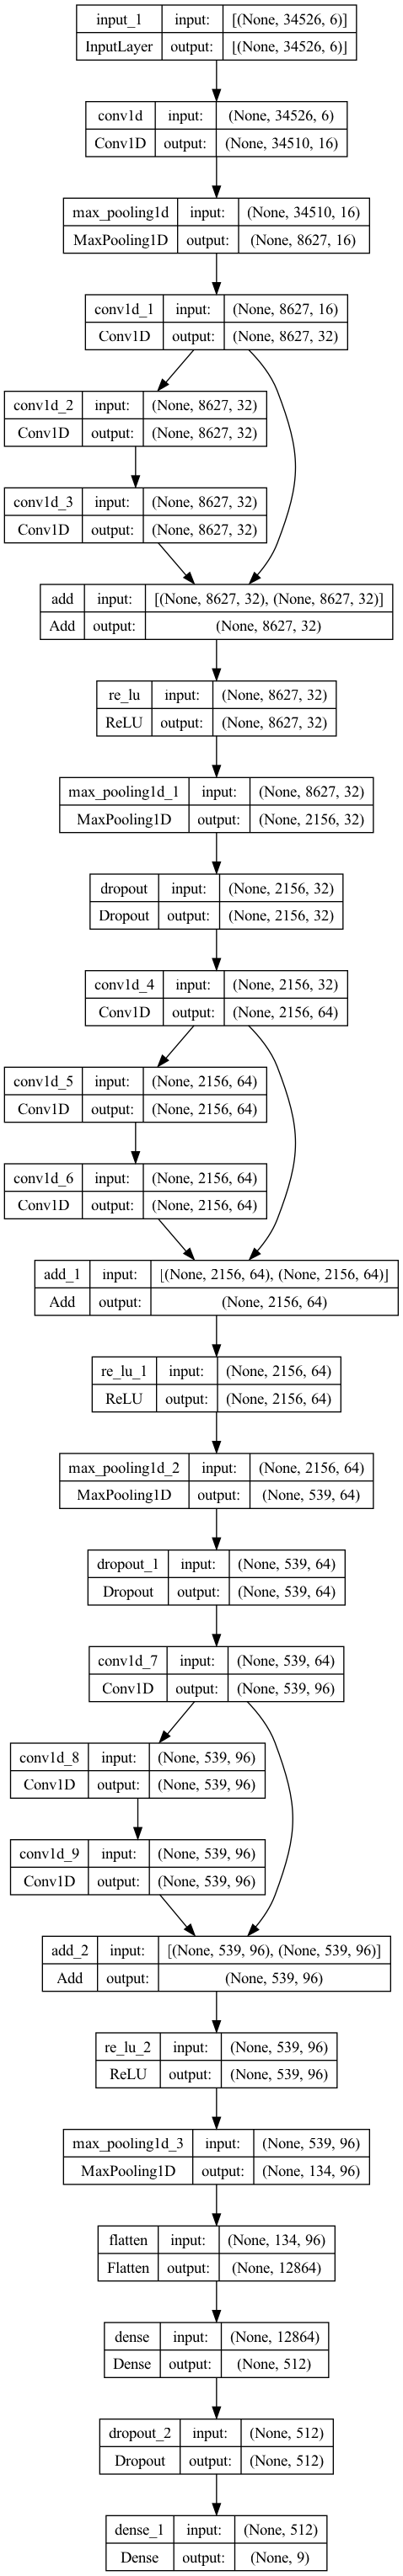

In [4]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 34510, 16)            1648      ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 8627, 16)             0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 8627, 32)             544       ['max_pooling1d[0][0]']   

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=2)])

Epoch 1/20
78/78 [==============================] - 592s 7s/step - loss: 2.7070 - ERM: 0.2029 - KDEL: 0.2316 - LMA: 0.0234 - MITO: -1.3215e-04 - NES: 0.0494 - NIK: 0.0311 - NLS: 0.0458 - NUCP: 0.0982 - OMM: 0.0302 - val_loss: 2.2935 - val_ERM: 0.2248 - val_KDEL: 0.1164 - val_LMA: 0.0990 - val_MITO: 0.0282 - val_NES: -0.1517 - val_NIK: 0.0331 - val_NLS: 0.2113 - val_NUCP: -0.0578 - val_OMM: -0.0953
Epoch 2/20
78/78 [==============================] - 521s 6s/step - loss: 2.2751 - ERM: 0.2629 - KDEL: 0.2895 - LMA: 0.1018 - MITO: 0.0548 - NES: 0.0959 - NIK: 0.0653 - NLS: 0.0829 - NUCP: 0.1373 - OMM: 0.0460 - val_loss: 2.2711 - val_ERM: 0.2274 - val_KDEL: 0.1501 - val_LMA: 0.0855 - val_MITO: 0.1480 - val_NES: -0.0860 - val_NIK: 0.0392 - val_NLS: 0.2132 - val_NUCP: -0.0424 - val_OMM: -0.0982
Epoch 3/20
78/78 [==============================] - 524s 6s/step - loss: 2.2567 - ERM: 0.2594 - KDEL: 0.3138 - LMA: 0.0986 - MITO: 0.0915 - NES: 0.1034 - NIK: 0.0815 - NLS: 0.0799 - NUCP: 0.1426 - OMM: 0

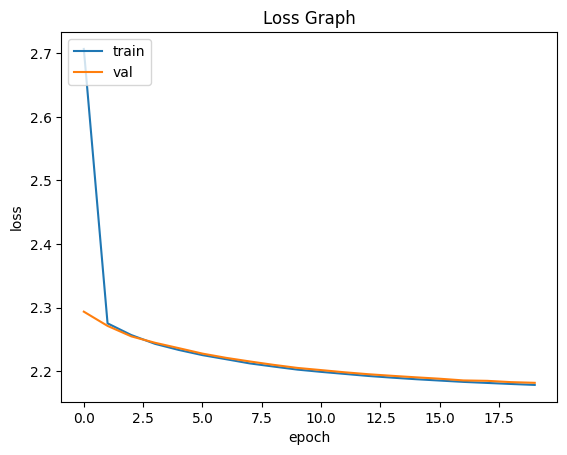

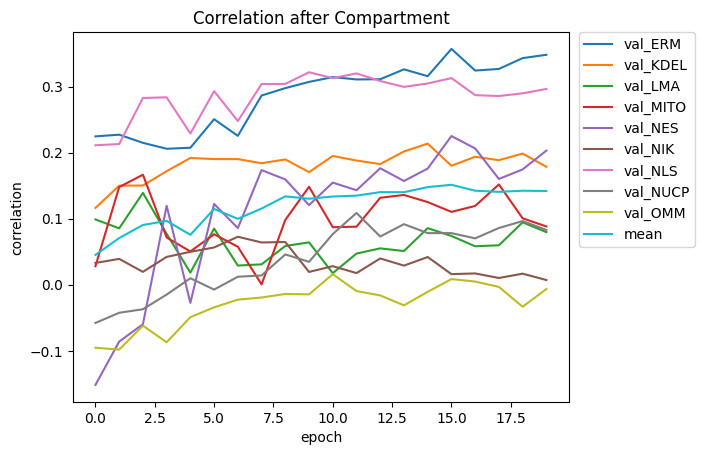

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

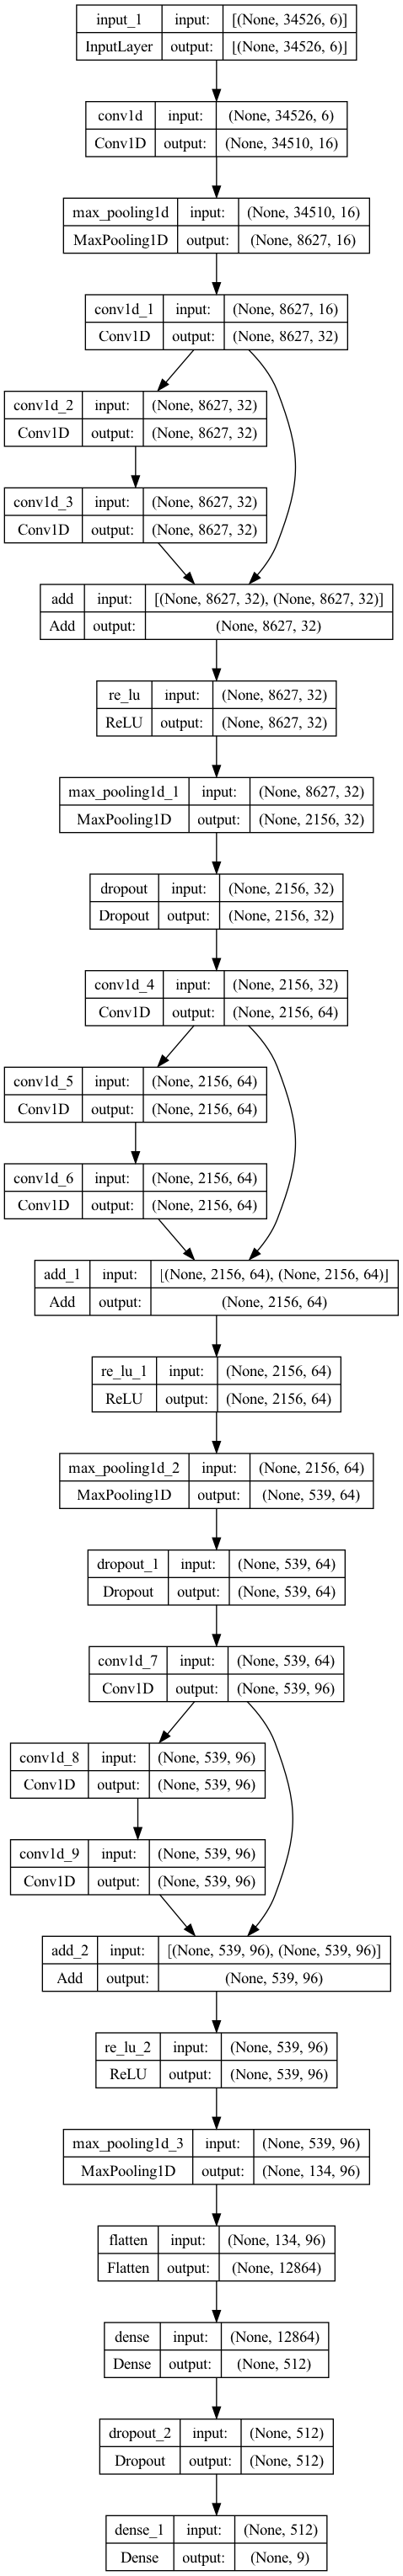

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

In [9]:
model.save_model(model_output_path)